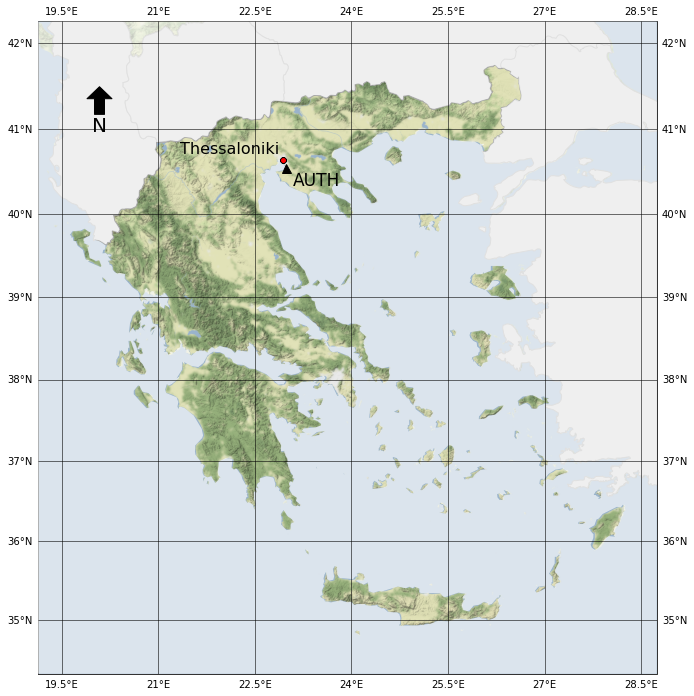

In [3]:
from shapely.geometry import Polygon
from cartopy.io import shapereader
import cartopy.io.img_tiles as cimgt
import cartopy.crs as ccrs
# import geopandas
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pandas as pd
import numpy as np
import geopandas

def rect_from_bound(xmin, xmax, ymin, ymax):
    """Returns list of (x,y)'s for a rectangle"""
    xs = [xmax, xmin, xmin, xmax, xmax]
    ys = [ymax, ymax, ymin, ymin, ymax]
    return [(x, y) for x, y in zip(xs, ys)]

# request data for use by geopandas
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'

shpfilename = shapereader.natural_earth(resolution, category, name)
df = geopandas.read_file(shpfilename)

# get geometry of a country
poly = [df.loc[df['ADMIN'] == 'Greece']['geometry'].values[0]]
poly2 = [df.loc[df['ADMIN'] == 'Albania']['geometry'].values[0]]
poly3 = [df.loc[df['ADMIN'] == 'Bulgaria']['geometry'].values[0]]
poly4 = [df.loc[df['ADMIN'] == 'Turkey']['geometry'].values[0]]
poly5 = [df.loc[df['ADMIN'] == 'Macedonia']['geometry'].values[0]]
stamen_terrain = cimgt.Stamen('terrain-background')

# projections that involved
st_proj = stamen_terrain.crs  #projection used by Stamen images
ll_proj = ccrs.PlateCarree()  #CRS for raw long/lat

# create fig and axes using intended projection
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1, 1, 1, projection=st_proj)
# ax.add_geometries(poly, crs=ll_proj, facecolor="lightgrey", edgecolor='darkgrey')
ax.add_geometries(poly2, crs=ll_proj, facecolor="lightgrey", edgecolor='darkgrey')
ax.add_geometries(poly3, crs=ll_proj, facecolor="lightgrey", edgecolor='darkgrey')
ax.add_geometries(poly4, crs=ll_proj, facecolor="lightgrey", edgecolor='darkgrey')
ax.add_geometries(poly5, crs=ll_proj, facecolor="lightgrey", edgecolor='darkgrey')
lons = np.array([40.64])                                                                                              
lats = np.array([22.94])
ax.plot(lats, lons, markersize=7, marker='8', markeredgecolor='black', linestyle='',color='red',transform=ccrs.PlateCarree(), zorder = 13)
ax.text(lats - 1.6, lons + 0.08, 'Thessaloniki', color = 'black', fontsize = 16, transform=ccrs.PlateCarree(), zorder = 13) # Label AUTH

lons = np.array([40.54])                                                                                              
lats = np.array([22.99])
ax.plot(lats, lons, markersize=9, marker='^',linestyle='',color='black',transform=ccrs.PlateCarree(), zorder = 13)
ax.text(lats + 0.1, lons - 0.2, 'AUTH', fontsize = 17, transform=ccrs.PlateCarree(), zorder = 13) # Label AUTH

pad1 = 0.5  #padding, degrees unit
exts = [poly[0].bounds[0] - pad1, poly[0].bounds[2] + pad1, poly[0].bounds[1] - pad1, poly[0].bounds[3] + pad1];
ax.set_extent(exts, crs=ll_proj)

# make a mask polygon by polygon's difference operation
# base polygon is a rectangle, another polygon is simplified switzerland
msk = Polygon(rect_from_bound(*exts)).difference( poly[0].simplify(0.01) )
msk_stm  = st_proj.project_geometry (msk, ll_proj)  # project geometry to the projection used by stamen

# get and plot Stamen images
ax.add_image(stamen_terrain, 8) # this requests image, and plot

# plot the mask using semi-transparency (alpha=0.65) on the masked-out portion
ax.add_geometries(msk_stm, st_proj, zorder=12, facecolor='white', edgecolor='none', alpha=0.65)

ax.gridlines(draw_labels=True, color = 'black', ls = '--', alpha = 0.7, zorder = 100)
x, y, arrow_length = 0.1, 0.9, 0.06
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=10, headwidth=25),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes, zorder = 100)
plt.show()